In [1]:
import pandas as pd
import numpy as np

In [24]:
def load_xls_to_pandas(filepath , sheet_name):
    xls = pd.ExcelFile(filepath)
    df = pd.read_excel(xls, sheet_name)
    df.columns = df.iloc[1]
    # remove row 1 and 2
    df = df.iloc[2:]
    return df

df_raw = load_xls_to_pandas('data/hp_retro_data.xls', 'Discretized Data (Final)')
print(df_raw.shape)
df_raw.head(10)

(412, 26)


1,NUMBER,SEX,TEMP,HEART_RATE,AGE,PREV_VISIT,HX_TRAUMA,COMPLAINT_SITE,HX_ILLNESS,GAIT_REPORTED,...,GAIT_OBSERVED,PAIN_ROM_HIP,OTHER_PAIN_SITE,PAIN_PALPATION,SWELLING,CURRENT_ILLNESS,PREV_PROBLEMS,WBC,ESR,TRIAGE
2,1,FEMALE,?,GE80_LT120,GE6Y,?,NO,HIP,NO,NOT_WT_BEAR,...,?,YES,?,TENDER,NO,NO,NO,?,?,DISCHARGE
3,3,FEMALE,LT38,GE120,LT6Y,?,NO,LEG,NO,?,...,?,YES,NO,?,?,NO,NO,?,?,DISCHARGE
4,4,MALE,LT38,?,GE6Y,?,?,HIP,NO,?,...,LIMP,YES,NO,?,NO,YES,?,?,?,DISCHARGE
5,5,MALE,LT38,GE80_LT120,GE6Y,?,YES,HIP,?,?,...,NORMAL,YES,?,NORMAL,NO,NO,?,?,?,DISCHARGE
6,7,FEMALE,?,GE80_LT120,GE6Y,?,YES,HIP,?,?,...,NOT_WT_BEAR,?,LEG,?,NO,?,NO,?,?,DISCHARGE
7,8,FEMALE,LT38,GE80_LT120,GE6Y,?,NO,HIP,NO,NORMAL,...,NORMAL,YES,NO,NORMAL,?,NO,?,?,?,DISCHARGE
8,10,MALE,LT38,GE80_LT120,GE6Y,YES,NO,HIP,YES,NOT_WT_BEAR,...,?,YES,?,TENDER,NO,YES,YES,?,?,DISCHARGE
9,11,MALE,LT38,GE40_LT80,GE6Y,?,YES,HIP,NO,LIMP,...,?,NO,PELVIS,NORMAL,NO,NO,NO,?,?,DISCHARGE
10,14,MALE,LT38,GE80_LT120,GE6Y,YES,?,HIP,NO,LIMP,...,?,?,?,?,?,?,?,?,?,DISCHARGE
11,15,MALE,LT38,GE80_LT120,GE6Y,?,YES,HIP,NO,?,...,?,YES,?,TENDER,NO,NO,YES,?,?,DISCHARGE


In [3]:
# num_cols = ["TEMP", "HEART_RATE", "AGE", "DURATION", "WBC", "ESR"]
# cat_cols = ["SEX", "PREV_VISIT", "HX_TRAUMA", "COMPLAINT_SITE", "HX_ILLNESS",
#             "GAIT_REPORTED", "APPEARANCE", "HIP_REST", "HIP_ROM", "HIP_INT_ROT",
#             "HIP_INT_ROT", "HIP_FLEXION", "GAIT_OBSERVED", "PAIN_ROM_HIP", "OTHER_PAIN_SITE",
#             "PAIN_PALPATION", "SWELLING", "CURRENT_ILLNESS", "PREV_PROBLEMS"]

cat_bins = {
        "TRIAGE": {"DISCHARGE": 0, "XRAY": 0, "LAB_XRAY_BSCAN": 1},
        "OTHER_PAIN_SITE": {np.nan: 0, 'NO': 1, 'OTHER': 2,
                            'PELVIS': 3,'BACK': 4, 'LEG': 5},
        }

def preproc_df(df):
    df = df.replace('?', np.nan)
    print(df.isnull().sum())

    # df = df.dropna(axis=1, thresh=200)
    
    # create maps for all variables
    for col in set(df.columns) - set(["NUMBER", "TRIAGE"]):
        if col not in cat_bins:
            if np.nan in list(df[col].unique()):
                vals = [np.nan] + list(set(df[col].unique()) - {np.nan})
            else:
                vals = list(set(df[col].unique()))
            cat_bins[col] = {k: v for v, k in enumerate(vals)}

    # map categorical variables using cat_bins
    for col in df.columns:
        if col in cat_bins:
            df[col] = df[col].map(cat_bins[col])

    # encode categorical variables
    # print number of different variables in categorical columns

    # encode nans as a new category
    return df

df = preproc_df(df_raw.copy(deep=True))
df.head(10)

1
NUMBER               0
SEX                  0
TEMP                80
HEART_RATE          27
AGE                  0
PREV_VISIT         279
HX_TRAUMA           94
COMPLAINT_SITE       7
HX_ILLNESS          45
GAIT_REPORTED       56
DURATION            11
APPEARANCE          79
HIP_REST           339
HIP_ROM             37
HIP_INT_ROT         71
HIP_FLEXION         81
GAIT_OBSERVED      122
PAIN_ROM_HIP        80
OTHER_PAIN_SITE    119
PAIN_PALPATION     120
SWELLING           150
CURRENT_ILLNESS     51
PREV_PROBLEMS      122
WBC                241
ESR                250
TRIAGE               0
dtype: int64


/tmp/ipykernel_115337/3207066851.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('?', np.nan)


1,NUMBER,SEX,TEMP,HEART_RATE,AGE,PREV_VISIT,HX_TRAUMA,COMPLAINT_SITE,HX_ILLNESS,GAIT_REPORTED,...,GAIT_OBSERVED,PAIN_ROM_HIP,OTHER_PAIN_SITE,PAIN_PALPATION,SWELLING,CURRENT_ILLNESS,PREV_PROBLEMS,WBC,ESR,TRIAGE
2,1,0,0,1,0,0,1,1,1,3,...,0,2,0,1,1,1,1,0,0,0
3,3,0,1,3,1,0,1,4,1,0,...,0,2,1,0,0,1,1,0,0,0
4,4,1,1,0,0,0,0,1,1,0,...,1,2,1,0,1,2,0,0,0,0
5,5,1,1,1,0,0,2,1,0,0,...,2,2,0,2,1,1,0,0,0,0
6,7,0,0,1,0,0,2,1,0,0,...,3,0,5,0,1,0,1,0,0,0
7,8,0,1,1,0,0,1,1,1,2,...,2,2,1,2,0,1,0,0,0,0
8,10,1,1,1,0,2,1,1,2,3,...,0,2,0,1,1,2,2,0,0,0
9,11,1,1,2,0,0,2,1,1,1,...,0,1,3,2,1,1,1,0,0,0
10,14,1,1,1,0,2,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
11,15,1,1,1,0,0,2,1,1,0,...,0,2,0,1,1,1,2,0,0,0


TRIAGE
0    366
1     46
Name: count, dtype: int64


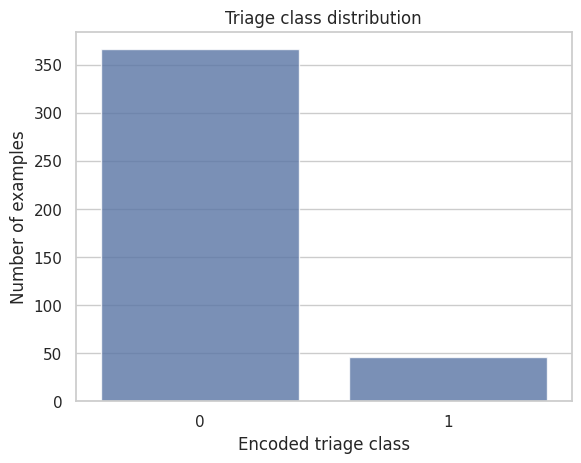

Percent of classes:
0.8883495145631068
0.11165048543689321


In [22]:
# count unique in TRIAGE
triage_counts = df['TRIAGE'].value_counts()
print(triage_counts)

# plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(triage_counts, alpha=0.8)
ax.set_ylabel('Number of examples')
ax.set_xlabel('Encoded triage class')
plt.title('Triage class distribution')
plt.show()

print("Percent of classes:")
print(triage_counts[0] / triage_counts.sum())
print(triage_counts[1] / triage_counts.sum())

In [5]:
df.describe()

1,NUMBER,SEX,TEMP,HEART_RATE,AGE,PREV_VISIT,HX_TRAUMA,COMPLAINT_SITE,HX_ILLNESS,GAIT_REPORTED,...,GAIT_OBSERVED,PAIN_ROM_HIP,OTHER_PAIN_SITE,PAIN_PALPATION,SWELLING,CURRENT_ILLNESS,PREV_PROBLEMS,WBC,ESR,TRIAGE
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,...,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,207.410194,0.648058,0.915049,1.419903,0.567961,0.609223,0.929612,2.359223,1.116505,1.696602,...,1.228155,1.242718,1.228155,1.148058,0.645631,1.167476,0.803398,1.084951,0.771845,0.111650
std,119.220417,0.478157,0.544887,0.880108,0.495962,0.901587,0.617976,1.506543,0.567591,1.136729,...,1.053962,0.757329,1.443631,0.842844,0.498812,0.622850,0.598203,1.349080,1.030618,0.315319
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.750000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,207.500000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,310.250000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,4.000000,1.000000,3.000000,...,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,0.000000
max,413.000000,1.000000,2.000000,3.000000,1.000000,2.000000,2.000000,4.000000,2.000000,3.000000,...,3.000000,2.000000,5.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000


In [6]:
print(df.shape)

(412, 26)


## Split, supersample, encode (one-hot)

In [7]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop(columns=['NUMBER', 'TRIAGE'])
y = df['TRIAGE']

print('Original dataset shape %s' % Counter(y))


Original dataset shape Counter({0: 366, 1: 46})


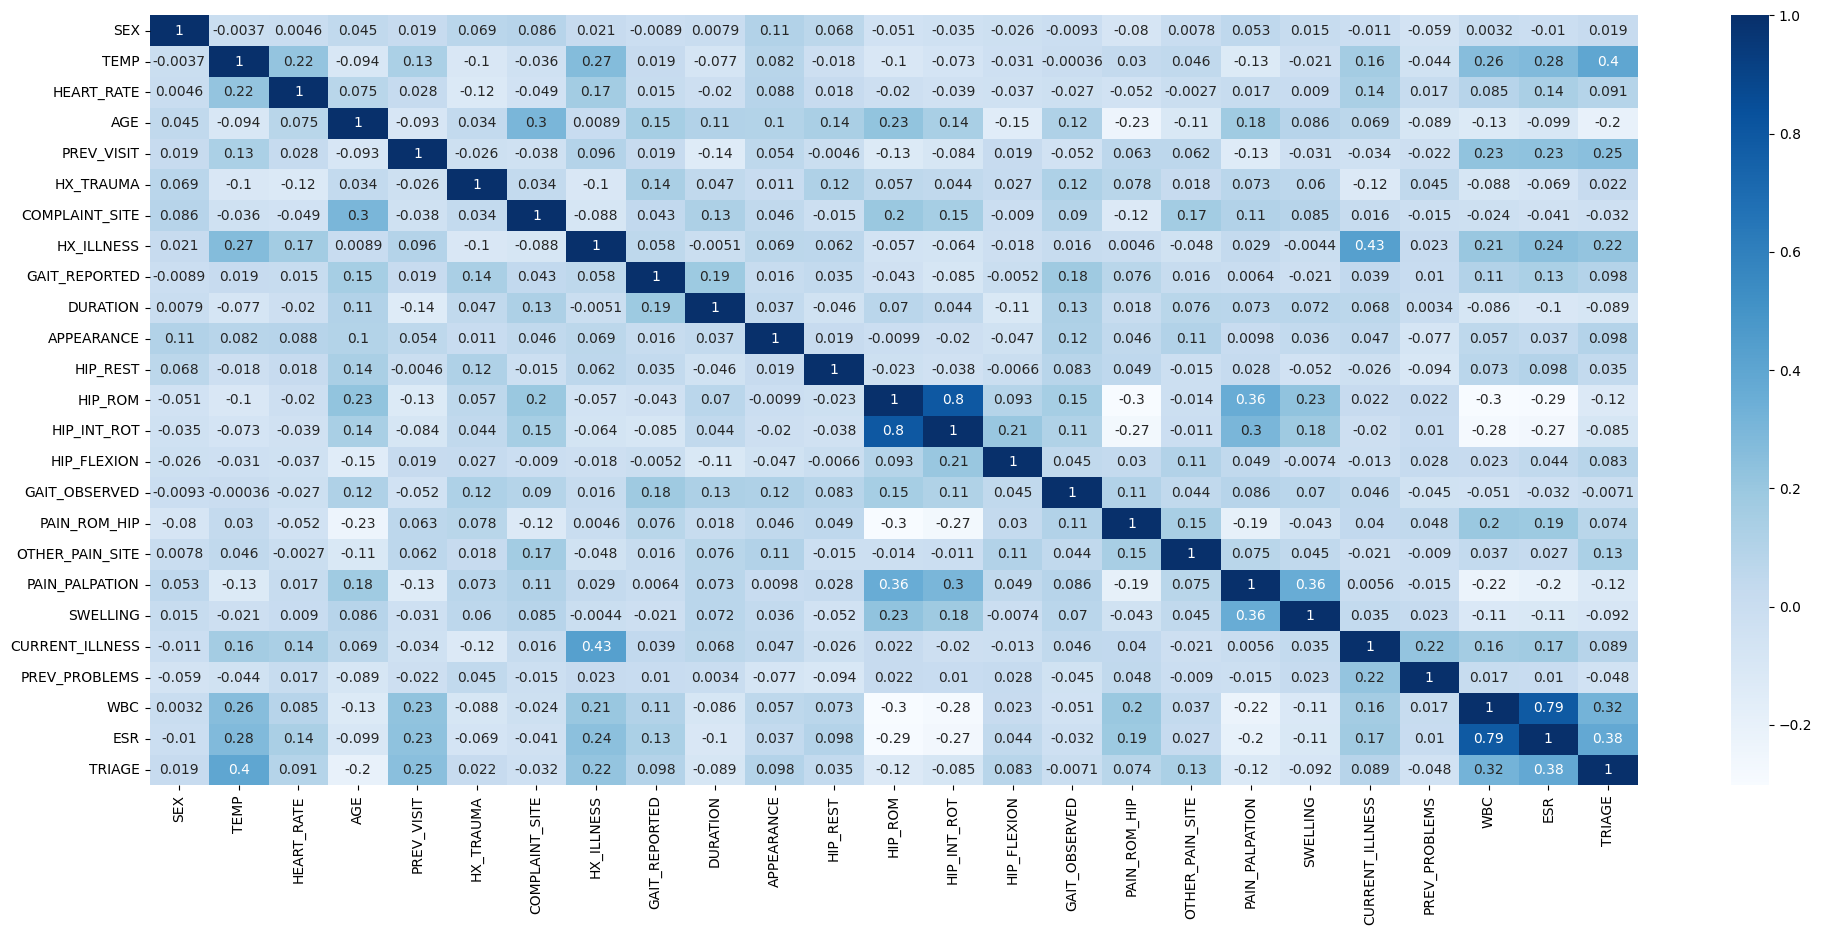

In [8]:
def show_correlations(df: pd.DataFrame) -> None:
    plt.figure(figsize=(24, 10))
    correlation_matrix = df.corr(method="kendall")
    sns.heatmap(correlation_matrix, annot=True, cmap="Blues")


show_correlations(pd.concat([X, y], axis=1))

In [9]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train and test datasets shape %s' % Counter(y_train), Counter(y_test))

sm = SMOTE(random_state=42)

encoder = OneHotEncoder()
X, y = encoder.fit_transform(X.values), y.values

k_folds = 5
kf = RepeatedStratifiedKFold(n_splits=k_folds, n_repeats=5, random_state=42)

Train and test datasets shape Counter({0: 292, 1: 37}) Counter({0: 74, 1: 9})


In [23]:
X.shape

(412, 84)

In [10]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc

def calculate_risk_thresholds(y: np.ndarray, y_pred: np.ndarray) -> tuple[float, float]:
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    sensitivity, specificity = tpr, 1 - fpr

    medium_risk = (
        thresholds[np.where(sensitivity >= 0.99)[0][0]] if np.any(sensitivity >= 0.99) else None
    )
    high_risk = (
        thresholds[np.where(specificity >= 0.90)[0][-1]] if np.any(specificity >= 0.90) else None
    )
    return medium_risk, high_risk

def make_prediction(y_pred_proba: np.ndarray, medium_risk: float, high_risk: float) -> np.ndarray:
    return np.array(
        [
            False if response < medium_risk else True if response >= high_risk else np.nan
            for response in y_pred_proba
        ]
    )

def calculate_rates(y: np.ndarray, y_pred: np.ndarray) -> tuple[float, float, float, float]:
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    # positives, negatives = tp + fn, tn + fp

    tpr = tp / (tp + fn)  # sensitivity
    fnr = fn / (fn + tp)  # miss_rate
    fpr = fp / (fp + tn)  # fall_out
    tnr = tn / (tn + fp)  # specificity

    return tpr, fnr, fpr, tnr

def auprc_score(y: np.ndarray, y_pred: np.ndarray) -> float:
    precision, recall, _ = precision_recall_curve(y, y_pred)
    return auc(recall, precision)

In [11]:
def assess_classifier(X, y, classifier):
    
    auprc, auroc = [], []
    negatives, positives, unknowns = [], [], []
    rates = []
    
    for train, test in kf.split(X, y):

        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]

        y_pred_proba_train = classifier.predict_proba(X_train)[:, 1]
        medium_risk, high_risk = calculate_risk_thresholds(y_train, y_pred_proba_train)
        
        y_pred_proba = classifier.predict_proba(X_test)[:, 1]
        auprc.append(auprc_score(y_test, y_pred_proba))
        auroc.append(roc_auc_score(y_test, y_pred_proba))

        predicted = make_prediction(y_pred_proba, medium_risk, high_risk)

        positive = np.sum(predicted == True)
        negative = np.sum(predicted == False)
        unknown = np.sum(np.isnan(predicted))

        number_of_samples: int = X_test.shape[0]
        negatives.append(negative / number_of_samples)
        positives.append(positive / number_of_samples)
        unknowns.append(unknown / number_of_samples)

        mask = ~np.isnan(predicted)
        rates.append(calculate_rates(y_test[mask], predicted[mask]))

    return {
        "auprc": np.mean(auprc),
        "auroc": np.mean(auroc),
        "negatives": np.mean(negatives),
        "positives": np.mean(positives),
        "unknowns": np.mean(unknowns),
        "rates": np.mean(rates, axis=0),
        }

## Model

### baseline model - logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression 

# Create a RandomForestClassifier instance

classifier = LogisticRegression(random_state=42, max_iter=1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
classifier.fit(X_train, y_train)

baseline_model = classifier
baseline_assessment = assess_classifier(X, y, baseline_model)
baseline_assessment


{'auprc': 0.8738434828493594,
 'auroc': 0.9769334814266322,
 'negatives': 0.5953570379077285,
 'positives': 0.17476344401998237,
 'unknowns': 0.22987951807228918,
 'rates': array([0.97911111, 0.02088889, 0.1107411 , 0.8892589 ])}

## Best model

In [13]:
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt

# Create a RandomForestClassifier instance

rf_models = []
baseline_models_assessments = []
for train, test in kf.split(X, y):    
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]

    classifier = RandomForestClassifier(random_state=42)

    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    classifier.fit(X_train_res, y_train_res)

    rf_models.append({
        'model': classifier,
        'assesment': assess_classifier(X, y, classifier)
            })

best_model = max(rf_models, key=lambda x: x['assesment']['auroc'])

best_model['assesment']

{'auprc': 0.9937468765802099,
 'auroc': 0.9991963470319635,
 'negatives': 0.8840258595357039,
 'positives': 0.11597414046429622,
 'unknowns': 0.0,
 'rates': array([0.956     , 0.044     , 0.01037394, 0.98962606])}

In [14]:
kfold_results = {
    'base': baseline_assessment,
    'best': best_model['assesment']
}

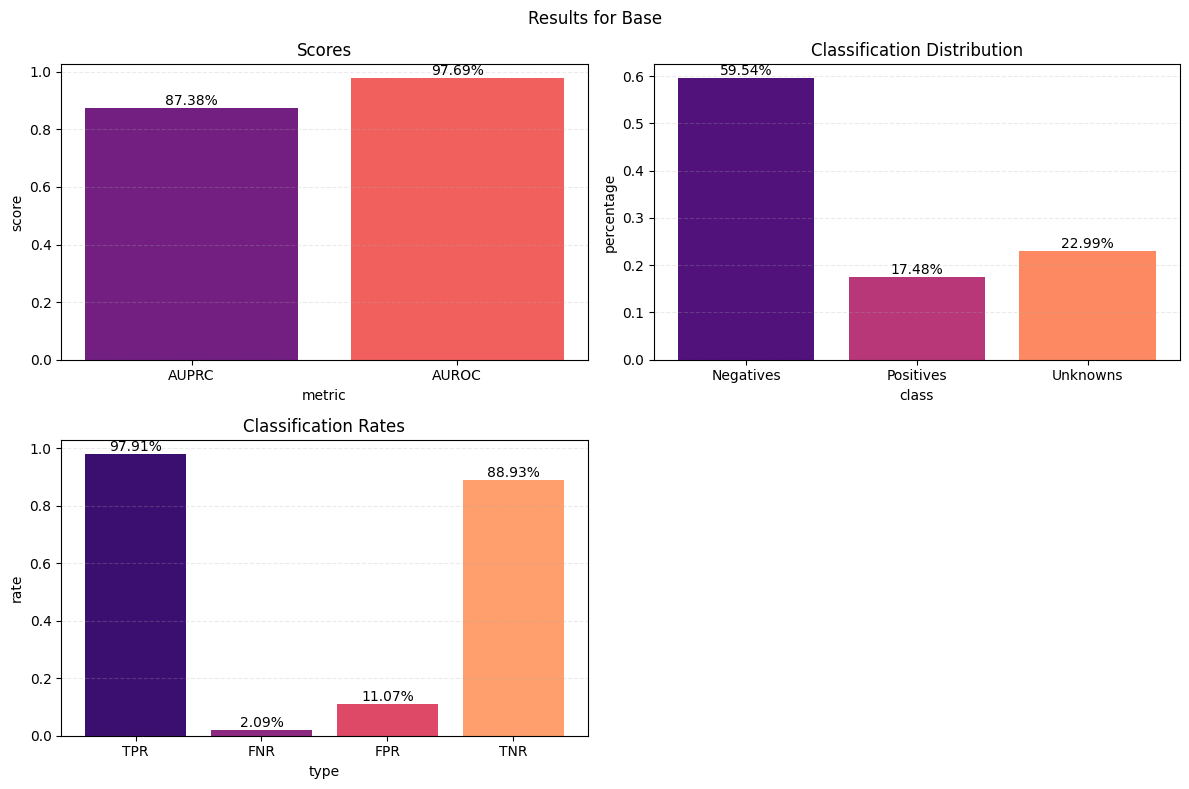

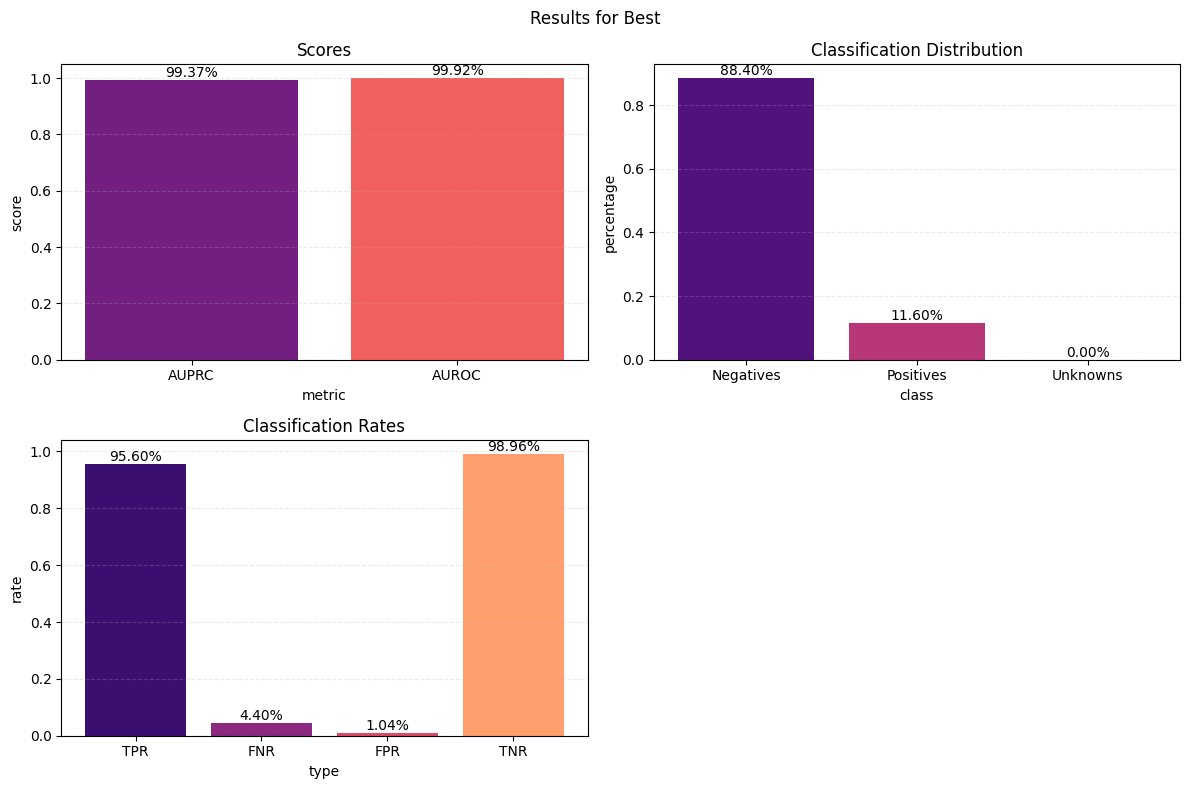

In [15]:
def show_result(result: dict, classifier: str) -> None:
    two_colors, three_colors, four_colors = [
        sns.color_palette("magma", number) for number in (2, 3, 4)
    ]
    fig, axs = plt.subplots(2, 2, figsize=(12, 8), tight_layout=True)
    ax1, ax2, ax3, ax4 = axs.flatten()

    ax1.bar(
        ["AUPRC", "AUROC"],
        [result["auprc"], result["auroc"]],
        color=two_colors,
    )
    ax1.grid(axis="y", linestyle="--", alpha=0.25)
    for i, value in enumerate([result["auprc"], result["auroc"]]):
        ax1.text(i, value, f"{value * 100:.2f}%", ha="center", va="bottom")
    ax1.set_xlabel("metric")
    ax1.set_ylabel("score")
    ax1.set_title("Scores")

    ax2.bar(
        ["Negatives", "Positives", "Unknowns"],
        [result["negatives"], result["positives"], result["unknowns"]],
        color=three_colors,
    )
    ax2.grid(axis="y", linestyle="--", alpha=0.25)
    for i, value in enumerate([result["negatives"], result["positives"], result["unknowns"]]):
        ax2.text(i, value, f"{value * 100:.2f}%", ha="center", va="bottom")
    ax2.set_xlabel("class")
    ax2.set_ylabel("percentage")
    ax2.set_title("Classification Distribution")

    ax3.bar(["TPR", "FNR", "FPR", "TNR"], result["rates"], color=four_colors)
    ax3.grid(axis="y", linestyle="--", alpha=0.25)
    for i, value in enumerate(result["rates"]):
        ax3.text(i, value, f"{value * 100:.2f}%", ha="center", va="bottom")
    ax3.set_xlabel("type")
    ax3.set_ylabel("rate")
    ax3.set_title("Classification Rates")

    # sns.heatmap(result["confusion_matrix"], annot=True, cmap="Blues", ax=ax4)
    # ax4.set_xticklabels(["Predicted 0", "Predicted 1"])
    # ax4.set_yticklabels(["Actual 0", "Actual 1"])
    # ax4.set_title("Confusion Matrix (mean)")
    ax4.axis("off")

    fig.suptitle(f"Results for {classifier.capitalize()}")
    fig.savefig(f"./resources/figures/hp_retro/{classifier}.png")
    plt.show()


for classifier, result in kfold_results.items():
    show_result(result, classifier)

In [28]:
import pickle

pickle.dump(baseline_model, open('baseline_model.p', 'wb'))

pickle.dump(best_model['model'], open('best_model.p', 'wb'))